In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prince
import seaborn as sns
import statsmodels.stats.multitest
from scipy import stats
from scipy.stats import fisher_exact

# Makam vs Usul

In [2]:
makam_usul_counts_path = "../data/makam_usul_counts.csv"
df = pd.read_csv(makam_usul_counts_path, index_col=0)

In [3]:
df

,14/4,2+2+3,3+3+3+4,Aksak,Aksak (9/4),Aksaksemâî,Aksaksemâî Evferi,Aydın,Ayîn Devr-i Revânı,Ağır Aksaksemâî,...,Âzerî Yürüksemâî,Çenber,Çenber (12/2),Çeng-i Harbî,Çiftedüyek,Çiftesofyan,Çiftesofyan (9/16),İki-Bir,İkiz Aksak,Şarkı Devr-i Revânı
Acem,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemaşîrân,0,0,0,9,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acembûselik,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acemkürdî,0,0,0,6,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Acemtarab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şevk-ı-Cedîd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevk-ı-Dil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkutarab,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Şevkâver,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def find_most_common_elements(df, top_n=15):
    """
    For each row in a dataframe, find the column(s) with the highest value.

    Parameters:
    df (pandas.DataFrame): The input dataframe with rows as primary items and columns as associated items
    top_n (int): Number of top row items to display, sorted by the maximum count

    Returns:
    dict: A dictionary mapping each row name to a tuple of (preferred_columns, max_count)
    """
    preferred_elements = {}
    for row_name, row_data in df.iterrows():
        # Skip if row sum is zero
        if row_data.sum() == 0:
            continue

        # Get the most common element(s)
        max_count = row_data.max()
        preferred = [
            col for col, count in row_data.items() if count == max_count
        ]
        preferred_elements[row_name] = (preferred, max_count)

    # Display the results
    print(f"Top {top_n} common elements:")
    for row_name, (elements, count) in sorted(
        preferred_elements.items(), key=lambda x: x[1][1], reverse=True
    )[:top_n]:
        print(
            f"Row: {row_name}, Preferred element(s): {', '.join(elements)} (used {count} times)"
        )

    return preferred_elements

In [5]:
top_15_makam_usul = find_most_common_elements(df, top_n=15)

Top 15 common elements:
Row: Hicaz, Preferred element(s): Aksak (used 26 times)
Row: Nihâvent, Preferred element(s): Düyek (used 24 times)
Row: Hüzzam, Preferred element(s): Aksak (used 21 times)
Row: Uşşak, Preferred element(s): Aksak, Sofyan (used 19 times)
Row: Mâhur, Preferred element(s): Aksak (used 18 times)
Row: Rast, Preferred element(s): Düyek (used 18 times)
Row: Segâh, Preferred element(s): Aksak (used 18 times)
Row: Hüseynî, Preferred element(s): Sofyan (used 17 times)
Row: Hicazkâr, Preferred element(s): Düyek (used 15 times)
Row: Kürdîlihicazkâr, Preferred element(s): Aksak (used 13 times)
Row: Muhayyer, Preferred element(s): Sofyan (used 13 times)
Row: Beyâtî, Preferred element(s): Düyek (used 10 times)
Row: Bûselik, Preferred element(s): Düyek (used 10 times)
Row: Sabâ, Preferred element(s): Aksak, Düyek (used 10 times)
Row: Acemaşîrân, Preferred element(s): Aksak (used 9 times)


## Frequent combination study 
Here we study the Makam-Usul pairs that happen at least 2 times in the data

In [6]:
def obtain_results_from_chi2(contingency_table: pd.DataFrame) -> tuple:
    """
    Calculate the standardized residuals from a chi-squared test on a contingency table.
    """
    # Perform chi-squared test
    chi2, p, _, expected = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V to measure association strength
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi_coef = np.sqrt(phi2 / min(k - 1, r - 1))

    # Calculate standardized residuals to identify specific associations
    observed = contingency_table.values
    residuals = (observed - expected) / np.sqrt(expected)

    std_residuals = pd.DataFrame(
        residuals,
        index=contingency_table.index,
        columns=contingency_table.columns,
    )

    return std_residuals, chi2, p, phi_coef

In [7]:
def plot_std_residuals_heatmap(
    std_residuals: pd.DataFrame,
    variables: tuple[str],
    figsize: tuple[int, int] = (16, 16),
    title_fontsize: int = 16,
):
    """
    Plot the standardized residuals as a heatmap.
    """
    # Plot the standardized residuals as a heatmap
    plt.figure(figsize=figsize)
    initial_mask = np.abs(std_residuals) < 2

    rows_to_keep = ~(initial_mask.all(axis=1))
    cols_to_keep = ~(initial_mask.all(axis=0))

    # Filter the std_residuals
    filtered_residuals = std_residuals.loc[rows_to_keep, cols_to_keep]
    print(
        f"Removed {len(std_residuals.index) - len(filtered_residuals.index)} rows"
    )
    print(
        f"Removed {len(std_residuals.columns) - len(filtered_residuals.columns)} columns"
    )

    # Create a new mask after filtering
    mask = np.abs(filtered_residuals) < 2

    # Plot the clustermap
    g = sns.clustermap(
        filtered_residuals,
        cmap="coolwarm",
        center=0,
        row_cluster=True,
        col_cluster=True,
        figsize=figsize,
        annot=False,
        mask=mask,
        vmin=-5,
        vmax=5,
    )
    # Add title
    g.figure.suptitle(
        f"Standardized Residuals Heatmap (|z| ≥ 2): {variables[0]}-{variables[1]} Associations",
        y=1,
        fontsize=title_fontsize,
    )

    # Set axis labels
    g.ax_heatmap.set_xlabel(variables[1], fontsize=10)
    g.ax_heatmap.set_ylabel(variables[0], fontsize=10)

    # Force all xticks and yticks
    g.ax_heatmap.set_xticks(np.arange(filtered_residuals.shape[1]) + 0.5)
    g.ax_heatmap.set_xticklabels(
        filtered_residuals.columns[g.dendrogram_col.reordered_ind], rotation=90
    )

    g.ax_heatmap.set_yticks(np.arange(filtered_residuals.shape[0]) + 0.5)
    g.ax_heatmap.set_yticklabels(
        filtered_residuals.index[g.dendrogram_row.reordered_ind], rotation=0
    )

    plt.tight_layout()
    plt.show()

Removed 4 rows
Removed 1 columns


<Figure size 1600x1600 with 0 Axes>

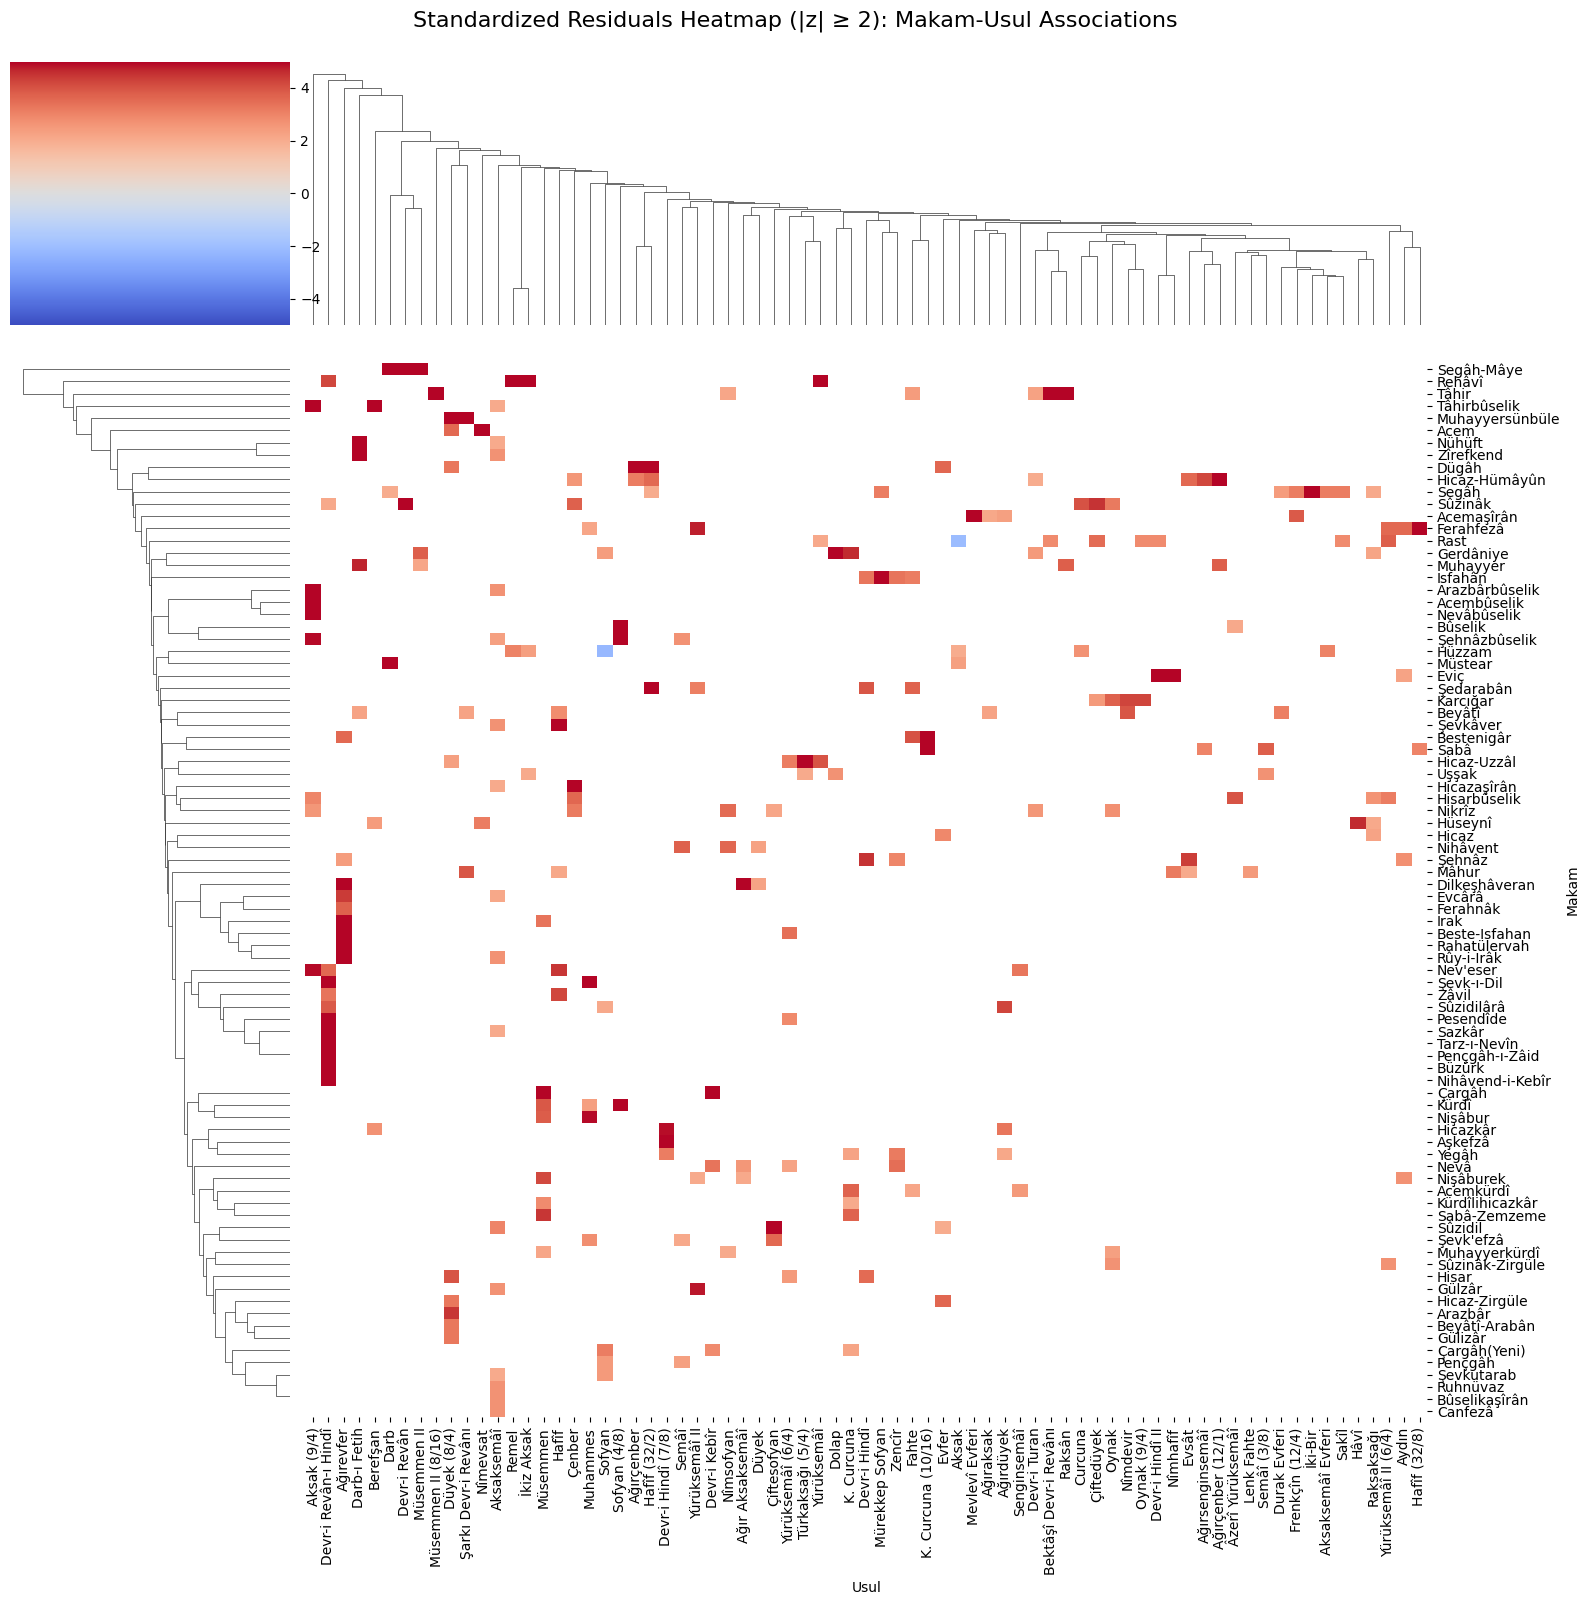

Chi-squared test statistic: 7545.9877, p-value: 0.0000, Cramer's V: 0.2217


In [8]:
# Filter to include only makams and usuls with sufficient data if needed
total_ocurrence_threshold = 2

makam_row_sums = df.sum(axis=1)
usul_col_sums = df.sum(axis=0)

filtered_makams = makam_row_sums[
    makam_row_sums >= total_ocurrence_threshold
].index
filtered_usuls = usul_col_sums[
    usul_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = df.loc[filtered_makams, filtered_usuls]
std_residuals, chi2, p, phi_coef = obtain_results_from_chi2(contingency_table)
plot_std_residuals_heatmap(std_residuals, variables=("Makam", "Usul"))

print(
    f"Chi-squared test statistic: {chi2:.4f}, p-value: {p:.4f}, Cramer's V: {phi_coef:.4f}"
)

In [9]:
def get_top_associations(
    flat_residuals, columns: tuple[str], top_n=15
) -> tuple:
    # Find the top 15 strongest positive associations
    top_associations = flat_residuals.head(top_n).reset_index()
    top_associations.columns = [
        columns[0],
        columns[1],
        "Standardized Residual",
    ]
    print(
        f"Top {top_n} strongest positive {columns[0]}-{columns[1]} associations:"
    )
    print(top_associations)

    # Find the top 15 strongest negative associations (avoidances)
    bottom_associations = flat_residuals.tail(top_n).reset_index()
    bottom_associations.columns = [
        columns[0],
        columns[1],
        "Standardized Residual",
    ]
    print(
        f"\nTop {top_n} strongest negative {columns[0]}-{columns[1]} associations (avoidances):"
    )
    print(bottom_associations)

    return top_associations, bottom_associations

In [10]:
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations, bottom_associations = get_top_associations(
    flat_residuals, columns=("Makam", "Usul"), top_n=15
)

Top 15 strongest positive Makam-Usul associations:
              Makam                 Usul  Standardized Residual
0        Segâh-Mâye         Devr-i Revân              16.155612
1      Tâhirbûselik             Berefşan              15.224390
2         Zîrefkend         Darb-ı Fetih              14.436231
3   Muhayyersünbüle  Şarkı Devr-i Revânı              14.436231
4             Tâhir   Müsemmen II (8/16)              14.298349
5              Acem             Nîmevsat              13.165828
6            Rehâvî                Remel              13.165828
7            Nühüft         Darb-ı Fetih              11.758988
8        Segâh-Mâye                 Darb              11.380141
9            Rehâvî           İkiz Aksak              10.719023
10      Acembûselik          Aksak (9/4)              10.159208
11       Segâh-Mâye          Müsemmen II              10.159208
12   Arazbârbûselik          Aksak (9/4)              10.159208
13      Nevâbûselik          Aksak (9/4)             

In [11]:
def plot_top_n_associations(
    associations: pd.DataFrame, variables: tuple[str], top_n=15
):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="Standardized Residual",
        y=variables[0],
        hue=variables[1],
        data=associations,
    )
    plt.title(
        f"Top {top_n} Strongest Positive {variables[0]} - {variables[1]} Associations"
    )
    plt.tight_layout()
    plt.show()

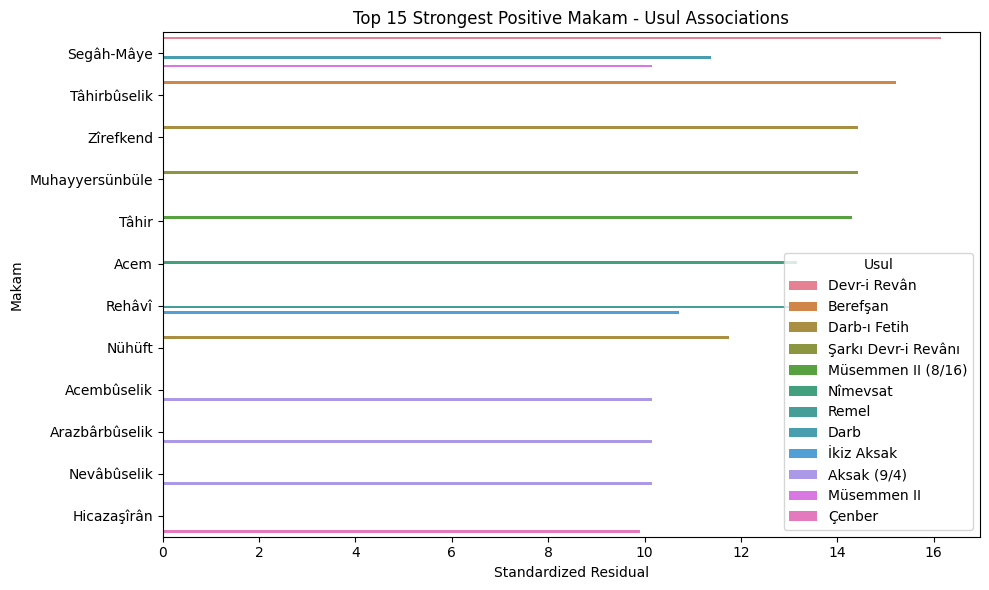

In [12]:
plot_top_n_associations(
    top_associations, variables=("Makam", "Usul"), top_n=15
)

## Rare combinations study 
Here we study the Makam-Usul pairs that happen at less than 2 times in the data

In [13]:
def plot_avoidances(
    avoidances: pd.DataFrame, variables: tuple[str], avoidance_threshold=-1.5
):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="Standardized Residual",
        y=variables[0],
        hue=variables[1],
        data=avoidances,
    )
    plt.title(
        f"Strong {variables[0]} - {variables[1]}  Avoidances (Residuals < {avoidance_threshold})"
    )
    plt.tight_layout()
    plt.show()

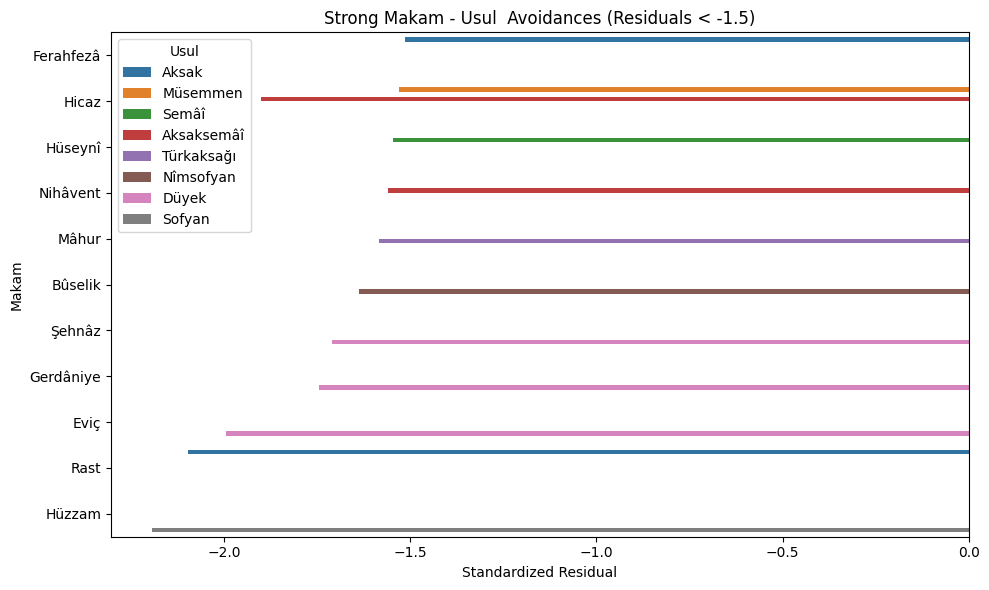

In [14]:
avoidance_threshold = -1.5  # or -2 for more conservative
strong_avoidances = flat_residuals[
    flat_residuals < avoidance_threshold
].reset_index()
strong_avoidances.columns = ["Makam", "Usul", "Standardized Residual"]
plot_avoidances(
    strong_avoidances,
    variables=("Makam", "Usul"),
    avoidance_threshold=avoidance_threshold,
)

## Correspondence Analysis

In [15]:
def plot_correspondence_analysis(contingency_table, variables: tuple[str]):
    # Perform Correspondence Analysis (CA)
    ca = prince.CA(
        n_components=2,
        n_iter=10,
        copy=True,
        check_input=True,
        engine="sklearn",
    )
    ca = ca.fit(contingency_table)

    # Get coordinates
    row_coords = ca.row_coordinates(contingency_table)
    col_coords = ca.column_coordinates(contingency_table)

    # Calculate total occurrences
    makam_sizes = contingency_table.sum(axis=1)
    usul_sizes = contingency_table.sum(axis=0)

    # Normalize sizes for plotting
    makam_sizes_norm = (makam_sizes**0.5) * 10
    usul_sizes_norm = (usul_sizes**0.5) * 10

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot makams with size scaling
    ax.scatter(
        row_coords[0],
        row_coords[1],
        s=makam_sizes_norm[row_coords.index],  # size by frequency
        c="blue",
        label=variables[0],
        alpha=0.7,
    )
    for i, txt in enumerate(row_coords.index):
        ax.annotate(
            txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), fontsize=8
        )

    # Plot usuls with size scaling
    ax.scatter(
        col_coords[0],
        col_coords[1],
        s=usul_sizes_norm[col_coords.index],  # size by frequency
        c="red",
        marker="s",
        label=variables[1],
        alpha=0.7,
    )
    for i, txt in enumerate(col_coords.index):
        ax.annotate(
            txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), fontsize=8
        )

    # Axes styling
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.5)
    ax.axvline(0, color="gray", linestyle="--", linewidth=0.5)
    plt.title(
        f"Correspondence Analysis: {variables[0]} vs {variables[1]} (Point Size = Frequency)",
        fontsize=14,
    )
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

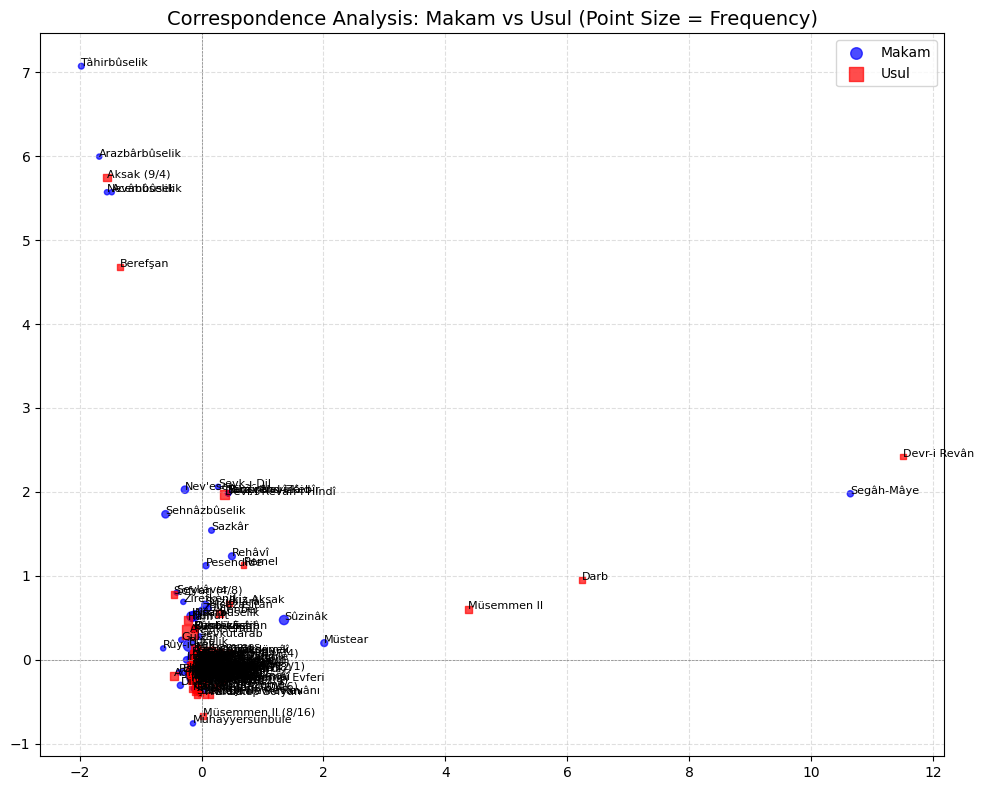

In [16]:
plot_correspondence_analysis(
    contingency_table=contingency_table, variables=("Makam", "Usul")
)

## Fisher's Exact Test

In [17]:
def plot_fisher_exact_test(
    contingency_table: pd.DataFrame, variables: tuple[str], top_n=15
):
    # Create a dataframe to store results
    fisher_results = pd.DataFrame(
        columns=[variables[0], variables[1], "Odds_Ratio", "P_Value"]
    )

    # For each Makam-Usul pair, create a 2x2 contingency table and run Fisher's exact test
    for i in contingency_table.index:
        for j in contingency_table.columns:
            # Get value for this specific Makam-Usul pair
            val = contingency_table.loc[i, j]

            # Create 2x2 table:
            # [ val, row_sum - val ]
            # [ col_sum - val, total - row_sum - col_sum + val ]
            row_sum = contingency_table.loc[i].sum()
            col_sum = contingency_table[j].sum()
            total = contingency_table.sum().sum()

            # Create the 2x2 table
            table = np.array(
                [
                    [val, row_sum - val],
                    [col_sum - val, total - row_sum - col_sum + val],
                ]
            )

            # Run Fisher's exact test
            odds_ratio, p_value = fisher_exact(table)

            # Store results
            fisher_results = fisher_results._append(
                {
                    variables[0]: i,
                    variables[1]: j,
                    "Odds_Ratio": odds_ratio,
                    "P_Value": p_value,
                },
                ignore_index=True,
            )

    # Apply multiple testing correction (Benjamini-Hochberg FDR)
    fisher_results["FDR_P_Value"] = statsmodels.stats.multitest.fdrcorrection(
        fisher_results["P_Value"]
    )[1]

    # Sort by significance
    fisher_results_sorted = fisher_results.sort_values("P_Value")

    # Display top significant associations
    print(
        f"Top {top_n} most significant {variables[0]}-{variables[1]} associations by Fisher's exact test:"
    )
    print(fisher_results_sorted.head(top_n))

    # Visualize top significant results
    plt.figure(figsize=(12, 8))
    top_results = fisher_results_sorted.head(top_n)
    sns.scatterplot(
        x="Odds_Ratio",
        y="-log10(P_Value)",
        data=top_results.assign(
            **{"-log10(P_Value)": -np.log10(top_results["P_Value"])}
        ),
    )

    # Add labels for the top points
    for i, row in top_results.iterrows():
        plt.text(
            row["Odds_Ratio"],
            -np.log10(row["P_Value"]),
            f"{row[variables[0]]}-{row[variables[1]]}",
            fontsize=8,
        )

    plt.title(
        f"Fisher's Exact Test Results: {variables[0]}-{variables[1]} Associations"
    )
    plt.xlabel("Odds Ratio")
    plt.ylabel("-log10(P-Value)")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

/var/folders/n2/8_d15htd6rb0x6h71q1l9fg40000gn/T/ipykernel_9022/2277250132.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fisher_results = fisher_results._append(


Top 15 most significant Makam-Usul associations by Fisher's exact test:
                Makam                 Usul  Odds_Ratio   P_Value  FDR_P_Value
5594            Tâhir   Müsemmen II (8/16)         inf  0.000003     0.017444
2238         Hicazkâr   Devr-i Hindî (7/8)    7.701665  0.000391     1.000000
3829         Nihâvent                Semâî    3.037548  0.000591     1.000000
3822         Nihâvent            Nîmsofyan    2.962093  0.000740     1.000000
113        Acemaşîrân       Mevlevî Evferi         inf  0.000883     1.000000
5029            Segâh              İki-Bir         inf  0.001810     1.000000
1664        Gerdâniye           K. Curcuna    9.033259  0.001937     1.000000
5342          Sûzinâk              Curcuna    6.667790  0.002396     1.000000
1470        Ferahfezâ        Yürüksemâî II   12.124260  0.003458     1.000000
5053       Segâh-Mâye         Devr-i Revân  699.666667  0.003800     1.000000
5637     Tâhirbûselik             Berefşan  524.750000  0.004273     1

/Users/theo/School/2/AMPLab/ethnomusicology_assignment/venv/lib/python3.13/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


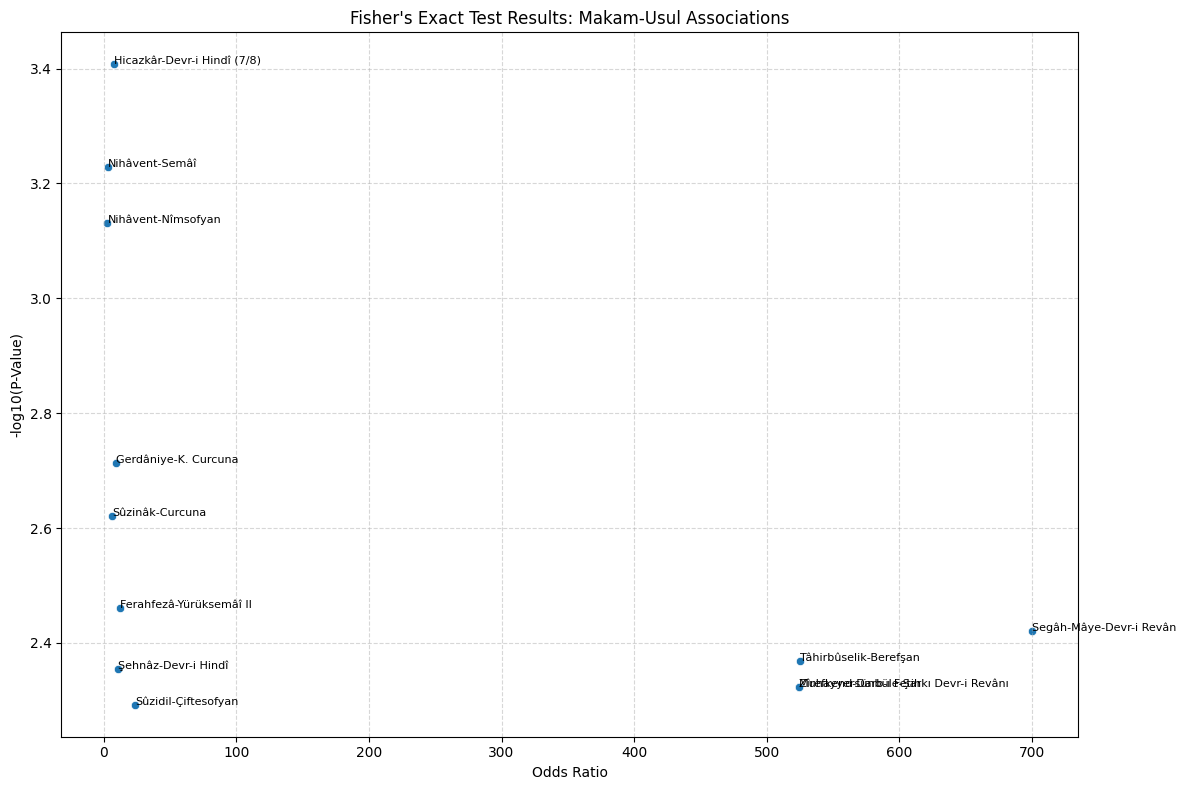

In [18]:
plot_fisher_exact_test(
    contingency_table=contingency_table, variables=("Makam", "Usul")
)

# Makam vs Cycle Length

In [19]:
makam_cycle_length_counts_path = "../data/makam_vs_cycle_length_counts.csv"
makam_cycles_df = pd.read_csv(makam_cycle_length_counts_path, index_col=0)

In [20]:
makam_cycles_df

,Extended,Long,Medium,Short
Acem,1,2,4,2
Acemaşîrân,5,9,42,12
Acembûselik,0,0,2,0
Acemkürdî,1,8,21,9
Acemtarab,1,0,0,0
...,...,...,...,...
Şevk-ı-Cedîd,0,0,1,0
Şevk-ı-Dil,1,1,0,0
Şevkutarab,0,1,0,2
Şevkâver,1,1,0,0


In [21]:
top_15_makam_lengths = find_most_common_elements(makam_cycles_df, top_n=15)

Top 15 common elements:
Row: Hicaz, Preferred element(s): Medium (used 96 times)
Row: Nihâvent, Preferred element(s): Medium (used 69 times)
Row: Uşşak, Preferred element(s): Medium (used 67 times)
Row: Hüzzam, Preferred element(s): Medium (used 63 times)
Row: Rast, Preferred element(s): Medium (used 60 times)
Row: Hicazkâr, Preferred element(s): Medium (used 54 times)
Row: Segâh, Preferred element(s): Medium (used 53 times)
Row: Hüseynî, Preferred element(s): Medium (used 50 times)
Row: Mâhur, Preferred element(s): Medium (used 50 times)
Row: Kürdîlihicazkâr, Preferred element(s): Medium (used 47 times)
Row: Acemaşîrân, Preferred element(s): Medium (used 42 times)
Row: Sabâ, Preferred element(s): Medium (used 42 times)
Row: Beyâtî, Preferred element(s): Medium (used 40 times)
Row: Bûselik, Preferred element(s): Medium (used 35 times)
Row: Karcığar, Preferred element(s): Medium (used 35 times)


## Frequent combination study 
Here we study the Makam - Cycle length pairs that happen at least 2 times in the data

Removed 79 rows
Removed 1 columns


<Figure size 600x800 with 0 Axes>

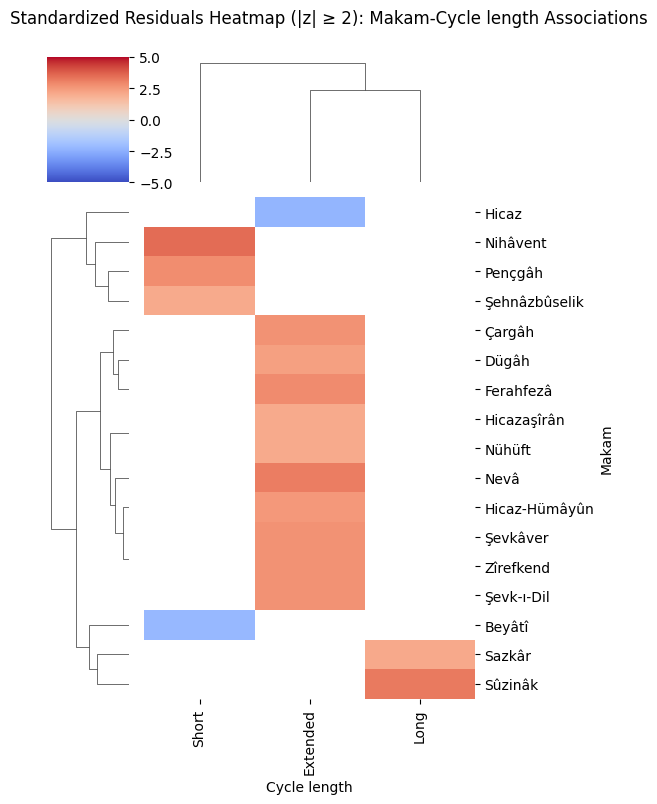

In [22]:
# Filter to include only makams and usuls with sufficient data if needed
total_ocurrence_threshold = 2

makam_row_sums = makam_cycles_df.sum(axis=1)
cycle_col_sums = makam_cycles_df.sum(axis=0)

filtered_makams = makam_row_sums[
    makam_row_sums >= total_ocurrence_threshold
].index
filtered_cycles = cycle_col_sums[
    cycle_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = makam_cycles_df.loc[filtered_makams, filtered_cycles]
std_residuals, chi2, p, phi_coef = obtain_results_from_chi2(contingency_table)
plot_std_residuals_heatmap(
    std_residuals,
    variables=("Makam", "Cycle length"),
    figsize=(6, 8),
    title_fontsize=12,
)

In [23]:
# Find the top 15 strongest positive associations
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations, bottom_associations = get_top_associations(
    flat_residuals, columns=("Makam", "Cycle length"), top_n=15
)

Top 15 strongest positive Makam-Cycle length associations:
            Makam Cycle length  Standardized Residual
0        Nihâvent        Short               3.511477
1         Sûzinâk         Long               3.230318
2            Nevâ     Extended               3.158595
3       Ferahfezâ     Extended               2.850811
4         Pençgâh        Short               2.787557
5        Şevkâver     Extended               2.656441
6       Zîrefkend     Extended               2.656441
7      Şevk-ı-Dil     Extended               2.656441
8          Çargâh     Extended               2.656441
9   Hicaz-Hümâyûn     Extended               2.517281
10          Dügâh     Extended               2.322082
11         Sazkâr         Long               2.096648
12  Şehnâzbûselik        Short               2.043839
13         Nühüft     Extended               2.032473
14    Hicazaşîrân     Extended               2.032473

Top 15 strongest negative Makam-Cycle length associations (avoidances):
    

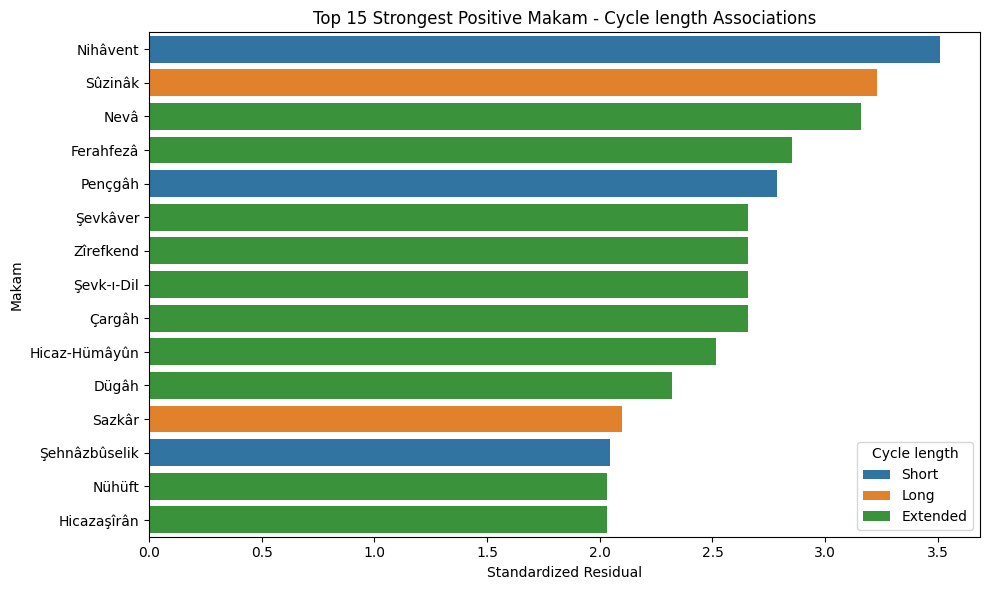

In [24]:
plot_top_n_associations(
    associations=top_associations,
    variables=("Makam", "Cycle length"),
    top_n=15,
)

## Rare combinations study 
Here we study the Makam - Cycle length pairs that happen at less than 2 times in the data

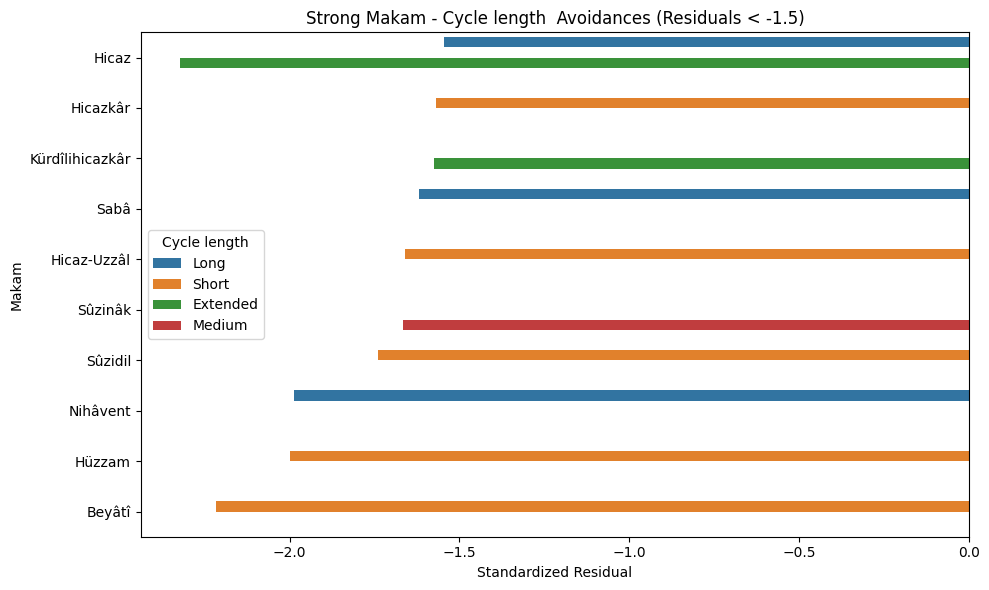

In [25]:
avoidance_threshold = -1.5  # or -2 for more conservative
strong_avoidances = flat_residuals[
    flat_residuals < avoidance_threshold
].reset_index()
strong_avoidances.columns = ["Makam", "Cycle length", "Standardized Residual"]
plot_avoidances(
    avoidances=strong_avoidances,
    variables=("Makam", "Cycle length"),
    avoidance_threshold=avoidance_threshold,
)

## Correspondence Analysis

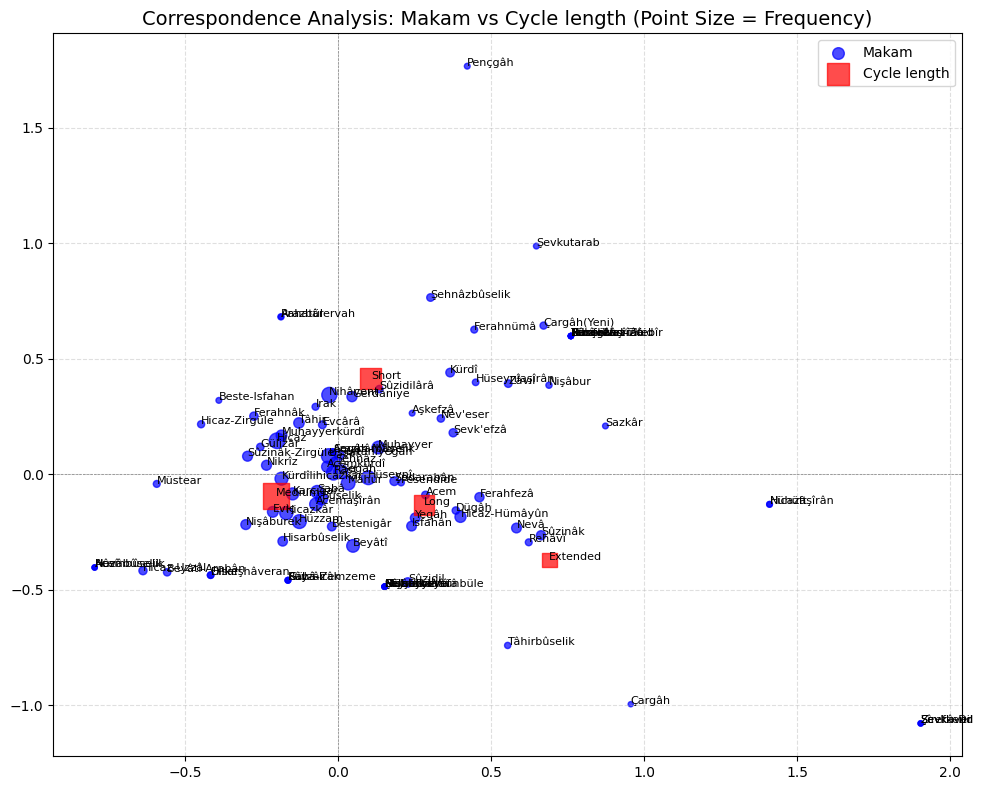

In [26]:
plot_correspondence_analysis(
    contingency_table=contingency_table, variables=("Makam", "Cycle length")
)

## Fisher's Exact Test

Top 20 most significant Makam-Cycle length associations by Fisher's exact test:
             Makam Cycle length  Odds_Ratio   P_Value  FDR_P_Value
215       Nihâvent        Short    2.095270  0.000103     0.039546
309        Sûzinâk         Long    4.507200  0.001934     0.371380
104          Hicaz     Extended    0.201215  0.007132     0.580709
39          Beyâtî        Short    0.370999  0.008429     0.580709
114    Hicaz-Uzzâl       Medium    9.227828  0.008711     0.580709
200           Nevâ     Extended    4.585850  0.009074     0.580709
239        Pençgâh        Short         inf  0.012005     0.658552
310        Sûzinâk       Medium    0.294390  0.018560     0.738858
76       Ferahfezâ     Extended    4.617886  0.018742     0.738858
151         Hüzzam        Short    0.501575  0.019241     0.738858
108  Hicaz-Hümâyûn     Extended    3.078755  0.021686     0.757027
213       Nihâvent         Long    0.529129  0.026268     0.840578
363  Şehnâzbûselik        Short    4.232074  0.03

/var/folders/n2/8_d15htd6rb0x6h71q1l9fg40000gn/T/ipykernel_9022/2277250132.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fisher_results = fisher_results._append(
/Users/theo/School/2/AMPLab/ethnomusicology_assignment/venv/lib/python3.13/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


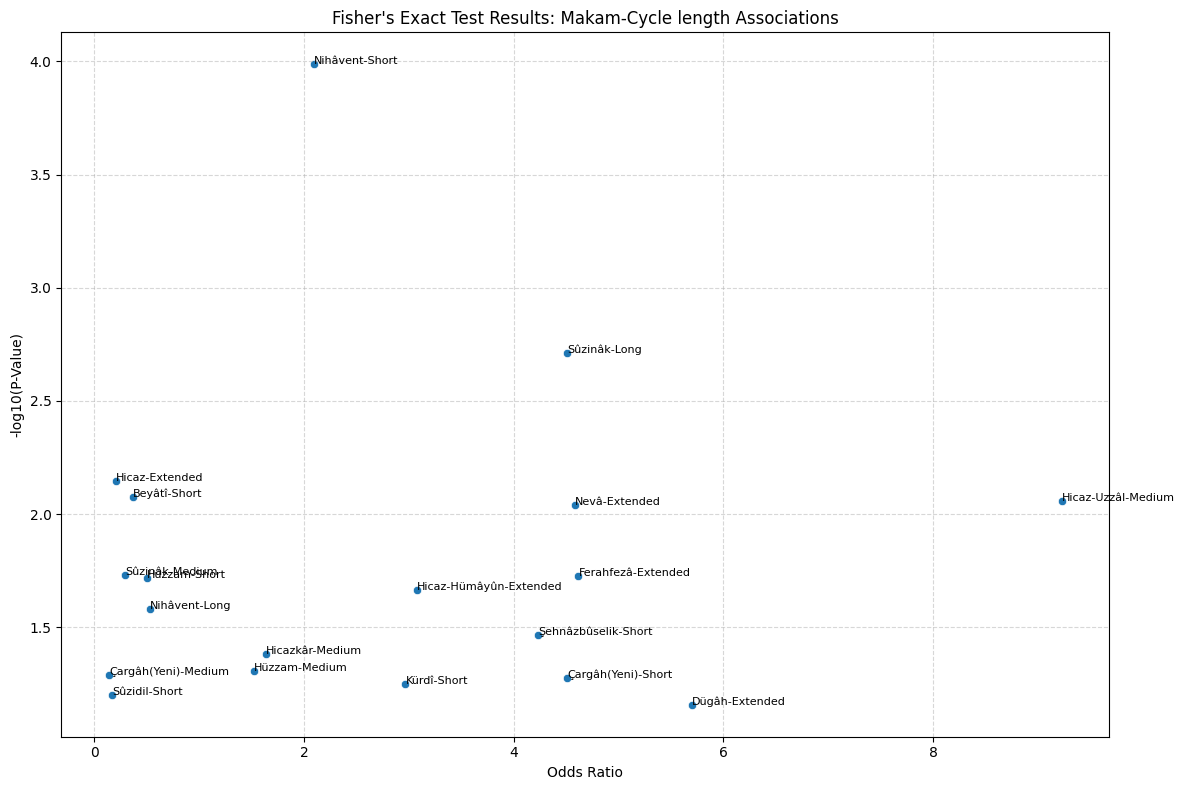

In [ ]:
plot_fisher_exact_test(
    contingency_table=contingency_table,
    variables=("Makam", "Cycle length"),
    top_n=20,
)

# Makam Durak vs Usul

In [28]:
durak_usul_counts_path = "../data/durak_usul.csv"
durak_usul_df = pd.read_csv(durak_usul_counts_path, index_col=0)

In [29]:
durak_usul_df

,14/4,2+2+3,3+3+3+4,Aksak,Aksak (9/4),Aksaksemâî,Aksaksemâî Evferi,Aydın,Ayîn Devr-i Revânı,Ağır Aksaksemâî,...,Âzerî Yürüksemâî,Çenber,Çenber (12/2),Çeng-i Harbî,Çiftedüyek,Çiftesofyan,Çiftesofyan (9/16),İki-Bir,İkiz Aksak,Şarkı Devr-i Revânı
A4,1,0,1,150,15,50,0,3,0,8,...,3,4,0,0,2,3,1,0,1,2
B (quarter-flat)4,0,1,0,42,0,5,2,0,0,2,...,1,0,0,0,0,3,0,2,1,1
B4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C (sharp)4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D4,0,0,0,8,0,10,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
D5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E4,0,0,0,3,0,12,0,0,1,0,...,0,1,0,0,0,2,0,0,0,0
F (sharp)4,0,0,0,15,0,10,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
F (slash-quarter-sharp)4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
top_15_durak_usul_lengths = find_most_common_elements(durak_usul_df, top_n=15)

Top 15 common elements:
Row: A4, Preferred element(s): Aksak (used 150 times)
Row: G4, Preferred element(s): Düyek (used 88 times)
Row: B (quarter-flat)4, Preferred element(s): Aksak (used 42 times)
Row: F (sharp)4, Preferred element(s): Aksak (used 15 times)
Row: E4, Preferred element(s): Aksaksemâî (used 12 times)
Row: F4, Preferred element(s): Sofyan (used 11 times)
Row: D4, Preferred element(s): Aksaksemâî, Sofyan (used 10 times)
Row: C5, Preferred element(s): Sofyan (used 4 times)
Row: D5, Preferred element(s): Müsemmen (used 2 times)
Row: B4, Preferred element(s): Devr-i Aryân, Muhammes, Müsemmen, Nîmsofyan, Sofyan (used 1 times)
Row: C (sharp)4, Preferred element(s): Sofyan (used 1 times)
Row: F (slash-quarter-sharp)4, Preferred element(s): Aksaksemâî (used 1 times)


## Frequent combination study 
Here we study the Makam - Cycle length pairs that happen at least 2 times in the data

Removed 0 rows
Removed 45 columns


<Figure size 800x600 with 0 Axes>

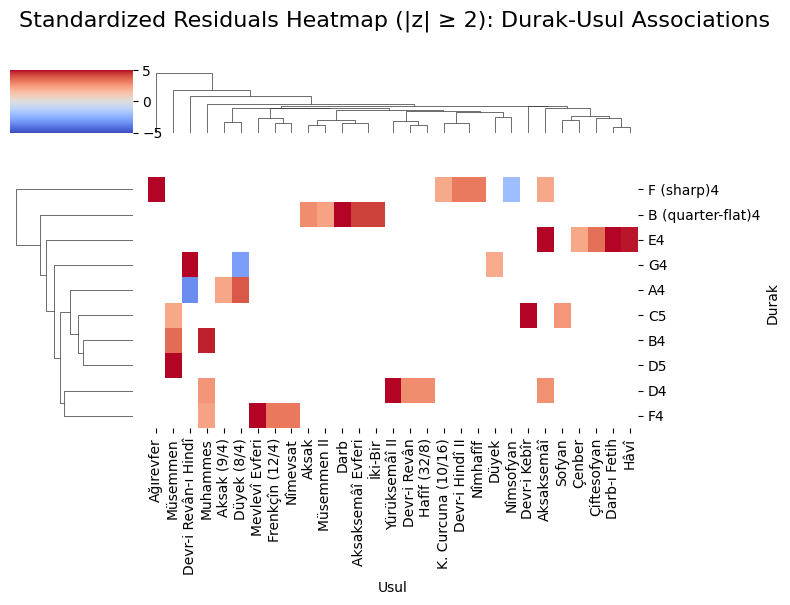

In [31]:
# Filter to include only makams and usuls with sufficient data if needed
total_ocurrence_threshold = 2

durak_row_sums = durak_usul_df.sum(axis=1)
usul_col_sums = durak_usul_df.sum(axis=0)

filtered_duraks = durak_row_sums[
    durak_row_sums >= total_ocurrence_threshold
].index
filtered_usuls = usul_col_sums[
    usul_col_sums >= total_ocurrence_threshold
].index

# Create a filtered contingency table
contingency_table = durak_usul_df.loc[filtered_duraks, filtered_usuls]
std_residuals, chi2, p, phi_coef = obtain_results_from_chi2(contingency_table)
plot_std_residuals_heatmap(
    std_residuals, variables=("Durak", "Usul"), figsize=(8, 6)
)

In [32]:
# Find the top 15 strongest positive associations
flat_residuals = std_residuals.stack().sort_values(ascending=False)
top_associations, bottom_associations = get_top_associations(
    flat_residuals, columns=("Durak", "Usul"), top_n=15
)

Top 15 strongest positive Durak-Usul associations:
                Durak                  Usul  Standardized Residual
0          F (sharp)4             Ağırevfer              14.405513
1                  D5              Müsemmen               8.486317
2                  F4        Mevlevî Evferi               6.771299
3   B (quarter-flat)4                  Darb               6.758864
4                  G4  Devr-i Revân-ı Hindî               6.677367
5                  E4          Darb-ı Fetih               6.031449
6                  E4            Aksaksemâî               5.967482
7                  C5          Devr-i Kebîr               5.212321
8                  D4         Yürüksemâî II               5.126143
9                  E4                  Hâvî               4.818106
10                 B4              Muhammes               4.758458
11  B (quarter-flat)4     Aksaksemâî Evferi               4.274681
12  B (quarter-flat)4               İki-Bir               4.274681
13         

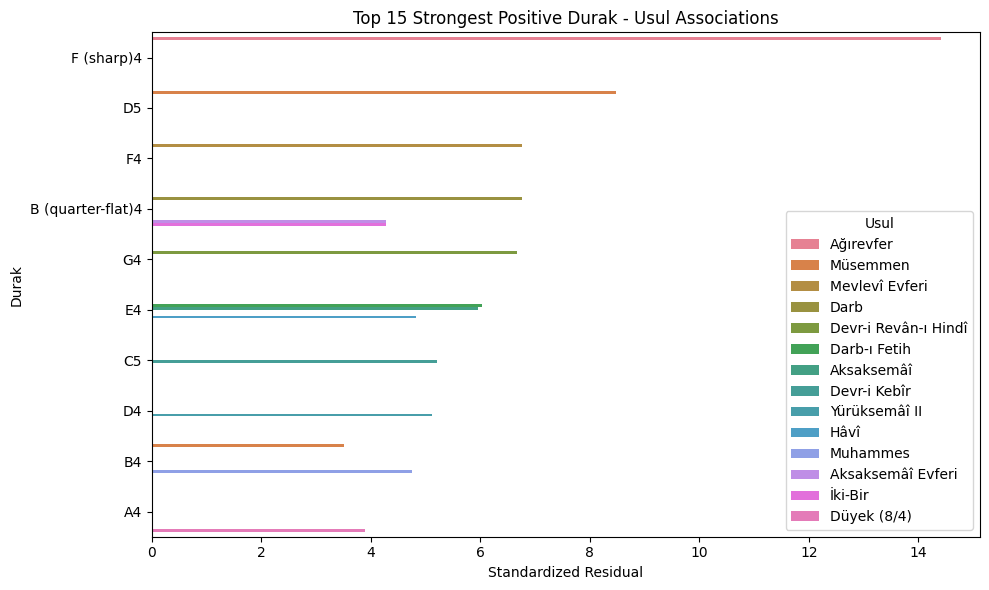

In [33]:
plot_top_n_associations(
    associations=top_associations, variables=("Durak", "Usul"), top_n=15
)

## Rare combinations study 
Here we study the Makam - Cycle length pairs that happen at less than 2 times in the data

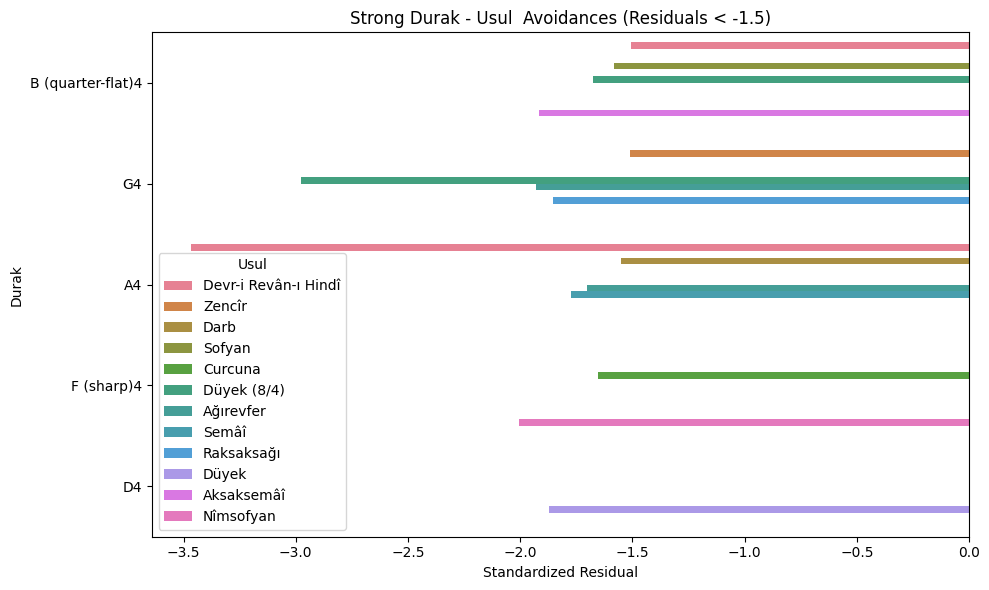

In [34]:
avoidance_threshold = -1.5  # or -2 for more conservative
strong_avoidances = flat_residuals[
    flat_residuals < avoidance_threshold
].reset_index()
strong_avoidances.columns = ["Durak", "Usul", "Standardized Residual"]
plot_avoidances(
    avoidances=strong_avoidances,
    variables=("Durak", "Usul"),
    avoidance_threshold=avoidance_threshold,
)

## Correspondence Analysis

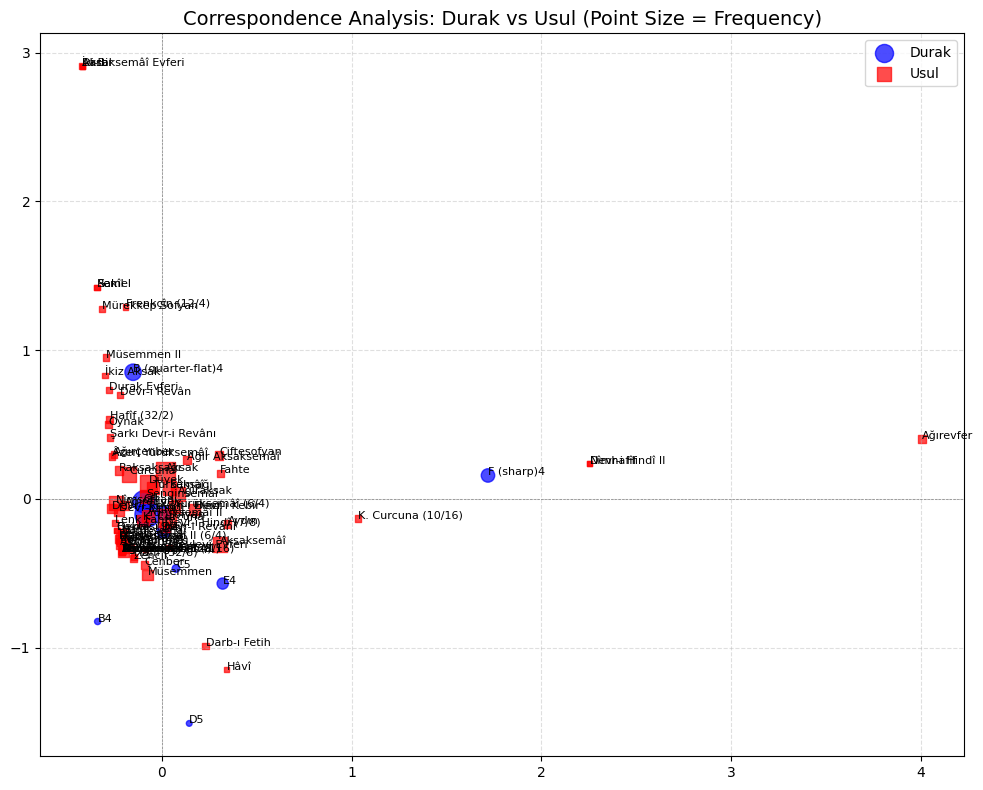

In [35]:
plot_correspondence_analysis(
    contingency_table=contingency_table, variables=("Durak", "Usul")
)

## Fisher's Exact Test

Top 20 most significant Durak-Usul associations by Fisher's exact test:
                 Durak                  Usul  Odds_Ratio       P_Value  \
688                 G4  Devr-i Revân-ı Hindî         inf  1.790240e-14   
526         F (sharp)4             Ağırevfer  148.214286  1.952332e-14   
27                  A4           Düyek (8/4)   33.260870  5.184719e-09   
22                  A4  Devr-i Revân-ı Hindî    0.000000  7.542853e-08   
446                 E4            Aksaksemâî    6.755680  3.196195e-06   
89   B (quarter-flat)4                  Darb         inf  5.803217e-06   
693                 G4           Düyek (8/4)    0.000000  5.722765e-05   
360                 D4         Yürüksemâî II    6.548644  1.166118e-04   
412                 D5              Müsemmen  118.111111  8.903191e-04   
631                 F4        Mevlevî Evferi         inf  1.596991e-03   
74   B (quarter-flat)4                 Aksak    1.784744  3.321211e-03   
1                   A4           Aksak (

/var/folders/n2/8_d15htd6rb0x6h71q1l9fg40000gn/T/ipykernel_9022/2277250132.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fisher_results = fisher_results._append(
/Users/theo/School/2/AMPLab/ethnomusicology_assignment/venv/lib/python3.13/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


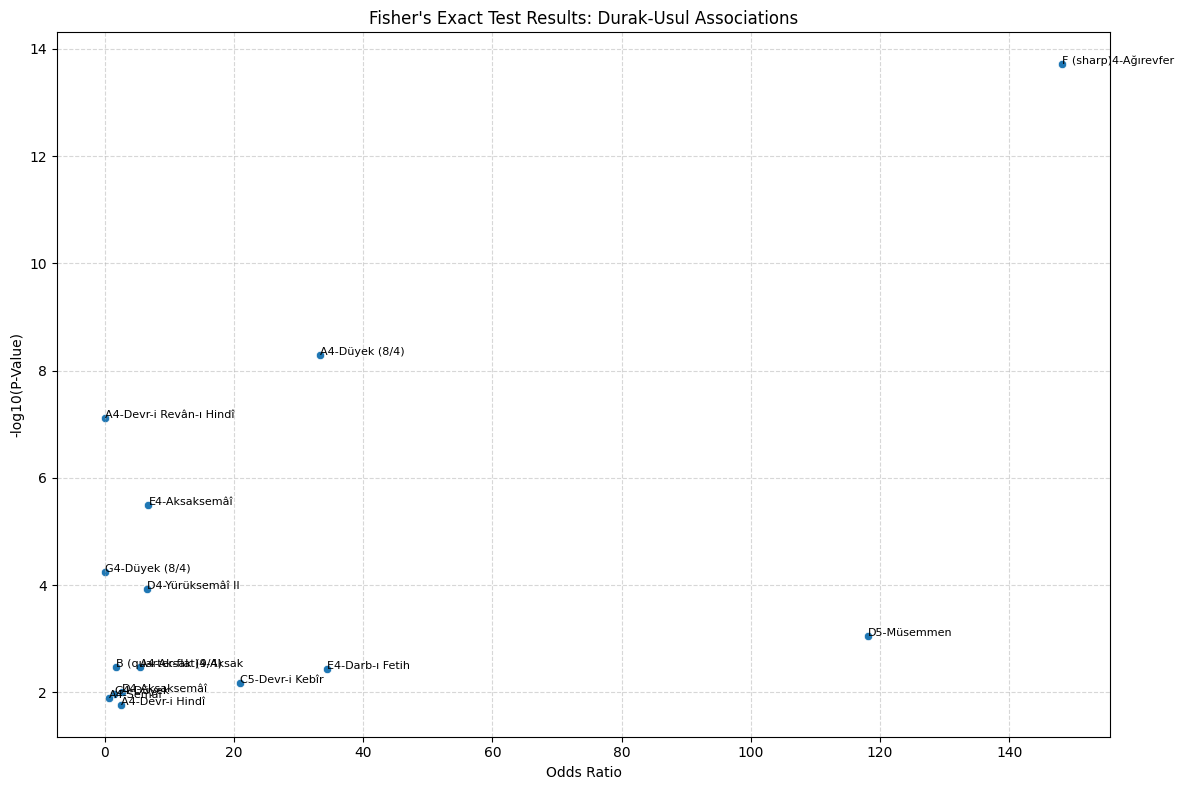

In [36]:
plot_fisher_exact_test(
    contingency_table=contingency_table,
    variables=("Durak", "Usul"),
    top_n=20,
)